In [1]:
# import ML tools
import pandas as pd
import numpy as np

In [2]:
# import plotting tools
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from IPython.core.pylabtools import figsize
# set grid size and style
figsize(12, 4)
sns.set_style('whitegrid')

Use "mp.colors(<index>)" as color attribute for Seaborn plots.
This is your color palette...


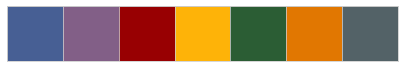

In [3]:
# import custom palette
import my_palette as mp

In [4]:
# read in actor dataset
df = pd.read_json('capstone1_ds.json')
df.reset_index(drop=True, inplace=True)
df.transpose()

,0,1,2,3,4,5,6,7,8,9,...,26282,26283,26284,26285,26286,26287,26288,26289,26290,26291
actor_value,5.417357,1.420861,0.53693,6.797755,0.055708,0.01187,0.192715,0.669717,1.570837,0.011897,...,4.523209e-17,7.554529e-22,2.779156e-22,1.022394e-22,1.872580e-24,2.310948e-28,-9.000000e-08,0.0,9.544325e-16,3.606126e-17
gender,0.000000,0.000000,1.00000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,...,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.0,1.000000e+00,0.000000e+00
age,48.000000,55.000000,41.00000,60.000000,58.000000,48.00000,12.000000,57.000000,48.000000,50.000000,...,3.100000e+01,3.900000e+01,6.600000e+01,3.800000e+01,7.700000e+01,4.100000e+01,5.200000e+01,29.0,2.900000e+01,2.800000e+01
runtime,110.000000,120.000000,115.00000,100.000000,130.000000,105.00000,100.000000,110.000000,95.000000,100.000000,...,1.050000e+02,1.050000e+02,1.050000e+02,1.050000e+02,1.050000e+02,1.050000e+02,1.000000e+02,100.0,1.200000e+02,1.300000e+02
rating,55.000000,48.000000,48.00000,43.000000,81.000000,90.00000,61.000000,61.000000,81.000000,57.000000,...,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,6.800000e+01,32.0,7.600000e+01,8.000000e+01
action,10.000000,19.000000,8.00000,1.000000,11.000000,1.00000,0.000000,0.000000,0.000000,3.000000,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,0.0,2.000000e+00,1.000000e+00
adventure,9.000000,17.000000,8.00000,1.000000,15.000000,5.00000,2.000000,3.000000,1.000000,11.000000,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.0,2.000000e+00,0.000000e+00
animation,4.000000,1.000000,0.00000,0.000000,4.000000,9.00000,3.000000,5.000000,2.000000,9.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00
comedy,2.000000,10.000000,12.00000,1.000000,2.000000,6.00000,2.000000,7.000000,2.000000,17.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.0,2.000000e+00,0.000000e+00
crime,3.000000,7.000000,3.00000,0.000000,0.000000,0.00000,0.000000,4.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.0,0.000000e+00,1.000000e+00


This dataset is focused on 26,292 actors.<br>
The project goal is to find the best regression technique to predict the target variable, actor value.<br>
The predictor variables are of three varieties:
 - 19 movie genres with values that are the counts of each type of genre associated with the actors' movies.
 - 2 personal variables that encode the gender of actors and their average ages at the time of their movie releases.
 - 2 movie variables that give the average runtime in minutes of their movies and the average rating of their movies on a 10 point scale.  

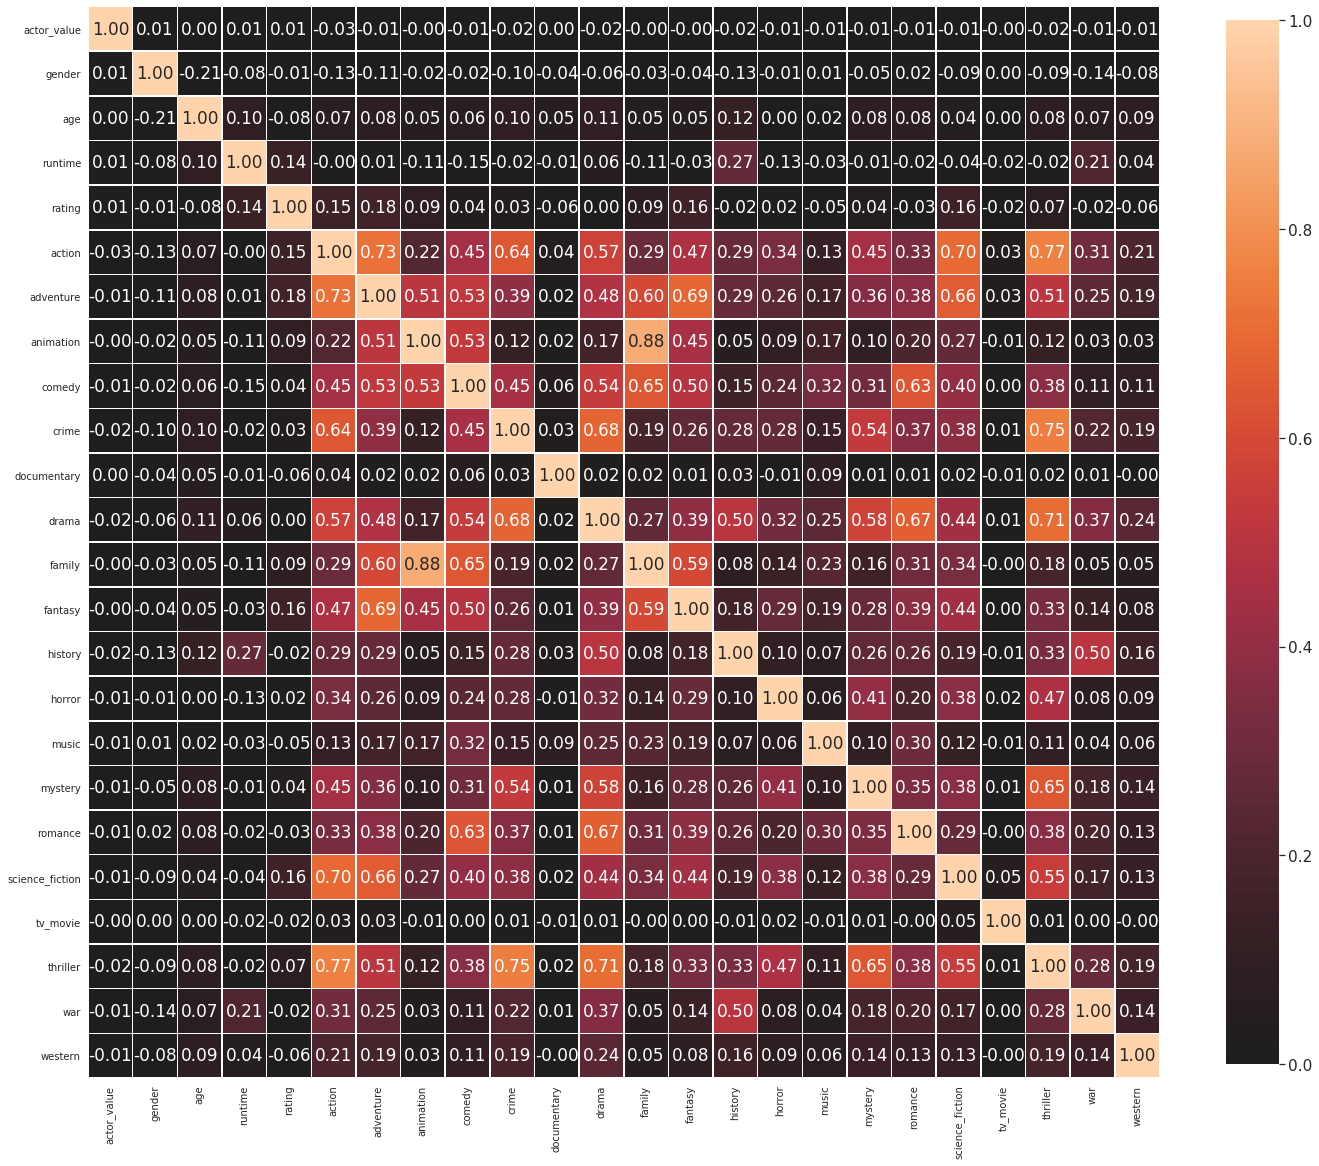

In [5]:
# plot heatmap of correlations
fig, ax = plt.subplots(figsize=(24,24))

sns.set(font_scale=1.4)
sns.heatmap(df.corr(), vmin=0, vmax=1.0, center=0, fmt='.2f', square=True, linewidths=.5, 
            annot=True, cbar_kws={"shrink": .80});

Aside from those between genres, the strongest correlation is a weak to moderate, negative correlation between actor age and gender.<br>
Male is 0 and female is 1.<br>
This suggests we will observe a general drop in age when switching from male to female actors, holding all other variables constant.

In [6]:
# get the correlation coefficient between actor age and gender
df.loc[:, ['age', 'gender']].corr()

,age,gender
age,1.000000,-0.207714
gender,-0.207714,1.000000


In [7]:
# split age variable by gender and make into two Series
male_age = df.loc[df['gender'] == 0]['age']
female_age = df.loc[df['gender'] == 1]['age']

In [8]:
# observe mean and quartiles
pd.DataFrame([male_age.rename('male').describe(), female_age.rename('female').describe()], 
             columns=male_age.describe().index.tolist())

,count,mean,std,min,25%,50%,75%,max
male,16587.0,41.219509,14.798689,0.0,31.0,40.0,51.0,171.0
female,9705.0,34.734055,14.636790,2.0,25.0,32.0,42.0,139.0


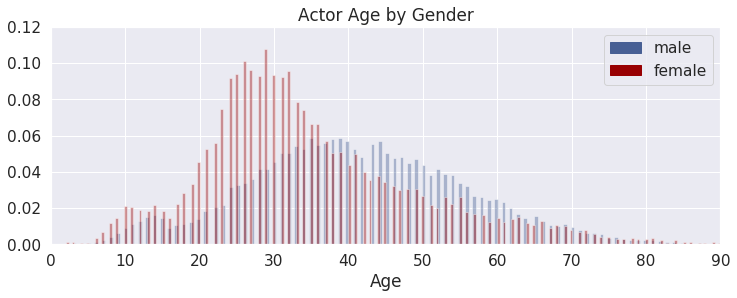

In [9]:
# plot age distributions of genders

plt.xlim(0, 90)
plt.ylim(0, 0.12)

sns.distplot(male_age, norm_hist=True, bins=350,kde=False, color=mp.colors(0))
sns.distplot(female_age, norm_hist=True, bins=350, kde=False, color=mp.colors(2))

# make color keys for legend
blue_patch = mpatches.Patch(color=mp.colors(0), label='male')
red_patch = mpatches.Patch(color=mp.colors(2), label='female')

plt.legend(handles=[blue_patch, red_patch])

plt.xlabel('Age')
plt.title('Actor Age by Gender');

After normalizing the distributions, the plot shows the female actors getting more of their roles at a younger age than the male actors.<br>
Also, there is bimodality in the distributions of both genders, indicating a decline in the number of roles for teen actors.

I will conduct a hypothesis test to compare the two distributions.

H_0: There is not a significant difference in the distribution of ages between male and female actors.<br>
H_A: There is a significant difference in the distribution of ages between male and female actors.

In [10]:
def perm_sample(data1, data2):
    """Generate permutation samples for 2 arrays"""
    # combine arrays
    data = np.concatenate((data1, data2))
    # permutate data
    perm_data = np.random.permutation(data)
    # draw samples with replacement
    perm_sample_1 = perm_data[:len(data1)]
    perm_sample_2 = perm_data[:len(data2)]
    
    return perm_sample_1, perm_sample_2

In [11]:
def draw_perm_samples(data1, data2, size=1):
    """Generate permutation samples multiple times"""
    for _ in range(size):
        perm_samp_1, perm_samp_2 = perm_sample(data1, data2)
        
    return perm_samp_1, perm_samp_2

In [12]:
# gernerate 10,000 permutation samples
np.random.seed(27)
perm_sample_male, perm_sample_female = draw_perm_samples(male_age, female_age, size=10000)

In [13]:
def ecdf(data):
    """Compute Emperical Cumulative Distribution Function for 1-Dim array"""
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n + 1) / n
    
    return x, y

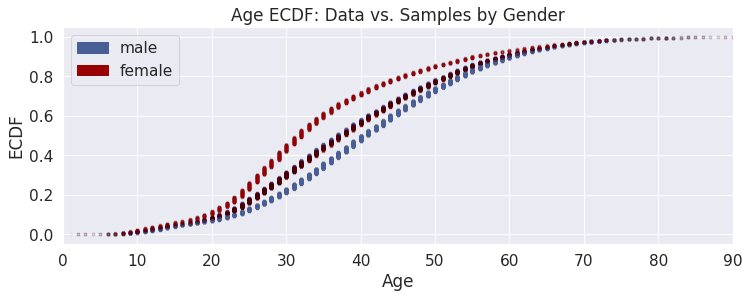

In [14]:
# plot Emperical Cumulative Distribution Functions for samples and data

plt.xlim(0, 90)

x_1, y_1 = ecdf(perm_sample_male)
x_2, y_2 = ecdf(perm_sample_female)

plt.plot(x_1, y_1, marker='.', linestyle='none', color=mp.colors(0) , alpha=0.02)
plt.plot(x_2, y_2, marker='.', linestyle='none', color=mp.colors(2), alpha=0.01)

x_1, y_1 = ecdf(male_age)
x_2, y_2 = ecdf(female_age)

plt.plot(x_1, y_1, marker='.', linestyle='none', color=mp.colors(0), alpha=0.02)
plt.plot(x_2, y_2, marker='.', linestyle='none', color=mp.colors(2), alpha=0.02)

plt.legend(handles=[blue_patch, red_patch])

plt.xlabel('Age')
plt.ylabel("ECDF")
plt.title('Age ECDF: Data vs. Samples by Gender');

The permutation samples overlap to make the purple curve, but between ages 20 and 60, the observed data does not overlap.<br>
The null hypothesis is not commensurate with the data.<br>
Let's put some numbers on that statement.<br>
I will compare the actors' mean age difference.

In [15]:
def diff_of_means(data1, data2):
    """Calculate the difference of the means of 2 arrays"""
    diff = np.mean(data1) - np.mean(data2)
    
    return diff

In [16]:
# get observed mean age difference
mean_age_diff_obs = diff_of_means(male_age, female_age)

In [17]:
f'The mean age difference of the data is: {mean_age_diff_obs:.1f} years.'

'The mean age difference of the data is: 6.5 years.'

In [18]:
f'The mean age difference of the samples is: {diff_of_means(perm_sample_male, perm_sample_female):.1f} years.'

'The mean age difference of the samples is: -0.2 years.'

The evidence is strong against the null hypothesis.<br>
I will calculate the probability of getting at least a mean age difference of 6.5 years under the null hypothesis.

In [19]:
def draw_perm_reps(data1, data2, func, size=1):
    """Generate multiple permutation replicates"""
    # instanciate replicates array
    perm_reps = np.empty(size)
    for i in range(size):
        perm_samp_1, perm_samp_2 = perm_sample(data1, data2)
        perm_reps[i] = func(perm_samp_1, perm_samp_2)
        
    return perm_reps

In [20]:
# create replicates of mean age difference
np.random.seed(27)
perm_reps_age = draw_perm_reps(male_age, female_age, diff_of_means, size=10000)

In [21]:
# compute p-value
p_chance = np.sum(perm_reps_age >= mean_age_diff_obs) / len(perm_reps_age)
f'The p-value is: {p_chance}.'

'The p-value is: 0.0.'

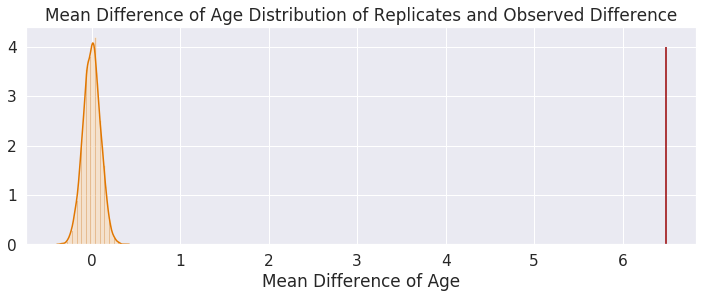

In [22]:
# plot permutation replicates and compare with observed mean difference

sns.distplot(perm_reps_age, color=mp.colors(5))
plt.vlines(mean_age_diff_obs, ymin=0, ymax=4, colors=mp.colors(2))

plt.xlabel('Mean Difference of Age')
plt.title('Mean Difference of Age Distribution of Replicates and Observed Difference');

The probability is very low that we will see at least a difference of 6.5 years by chance when the distibutions are the same.

Now, I will perform a two-sample bootstrap hypothesis test for the difference of the mean age of actors.<br>
This is testing to see if the genders have the same mean age, but not necessarily the same distribution.

H_0: There is not a significant difference in the mean of age between male and female actors.<br>
H_A: There is a significant difference in the mean of age between male and female actors.

In [23]:
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates"""
    # instanciate replicates array
    bs_reps = np.empty(size)
    for i in range(size):
        bs_reps[i] = func(np.random.choice(data, len(data)))
        
    return bs_reps

In [24]:
# get mean of all ages
mean_age = np.mean(df['age'])

In [25]:
# generate shifted arrays having same mean
male_shifted = male_age - np.mean(male_age) + mean_age
female_shifted = female_age - np.mean(female_age) + mean_age 

In [26]:
# get 10,000 bootstrap replicates from shifted arrays
N = 10000
bs_reps_male = draw_bs_reps(male_shifted, np.mean, N)
bs_reps_female = draw_bs_reps(female_shifted, np.mean, N)

In [27]:
# get replicates of difference of means
bs_reps = bs_reps_male - bs_reps_female

In [28]:
# get p-value
p_diff = np.sum(bs_reps >= mean_age_diff_obs) / N
f'The p-value is: {p_diff}.'

'The p-value is: 0.0.'

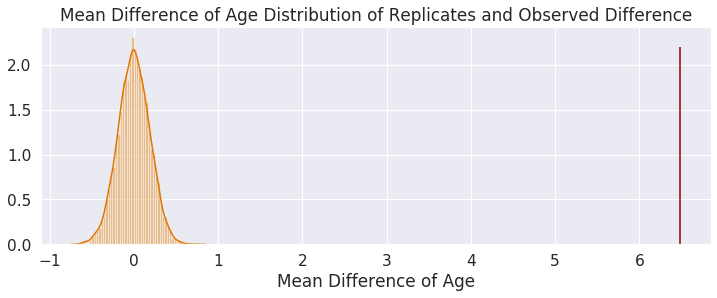

In [29]:
# plot bootstrap replicates and compare with observed mean difference

sns.distplot(bs_reps, color=mp.colors(5))
plt.vlines(mean_age_diff_obs, ymin=0, ymax=2.2, colors=mp.colors(2))

plt.xlabel('Mean Difference of Age')
plt.title('Mean Difference of Age Distribution of Replicates and Observed Difference');

This is the fraction of replicates with a difference in means greater than or equal to the observed difference of 6.5 years.<br>
Similarly, this null hypothesis concerning the difference in mean ages of actors is highly unlikely.

Now, let's look at the distribution of the dependent variable, actor value.

In [30]:
# split actor value variable by gender and put into Series
male_val = df.loc[df['gender'] == 0]['actor_value']
female_val = df.loc[df['gender'] == 1]['actor_value']

In [31]:
# observe mean and quartiles
pd.DataFrame([male_val.rename('male').describe(), female_val.rename('female').describe()], 
             columns=male_val.describe().index.tolist())

,count,mean,std,min,25%,50%,75%,max
male,16587.0,-90.543719,4166.095166,-421657.709326,0.000000e+00,4.920000e-08,0.001179,960.993604
female,9705.0,-31.231412,1255.029264,-93198.524765,-4.383482e-30,1.642000e-07,0.002837,1306.125726


The female actors have a higher mean value than the male actors, as well as the highest actor value overall.

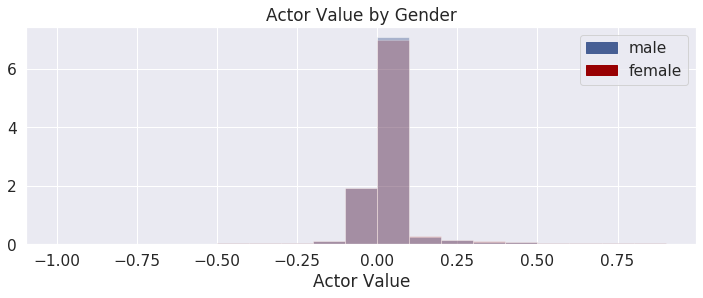

In [32]:
# plot actor value distributions of genders

bin_range = np.arange(-1, 1, 0.1)

sns.distplot(male_val, norm_hist=True, bins=bin_range ,kde=False, color=mp.colors(0))
sns.distplot(female_val, norm_hist=True, bins=bin_range, kde=False, color=mp.colors(2), hist_kws={'alpha':0.2})

plt.legend(handles=[blue_patch, red_patch])

plt.xlabel('Actor Value')
plt.title('Actor Value by Gender');

Most of the values are very close to zero. This is due to the billing order weight.<br>
This weight gave actors with low billing very little credit to the success or failure of a movie.<br>
Let's look a bit closer.

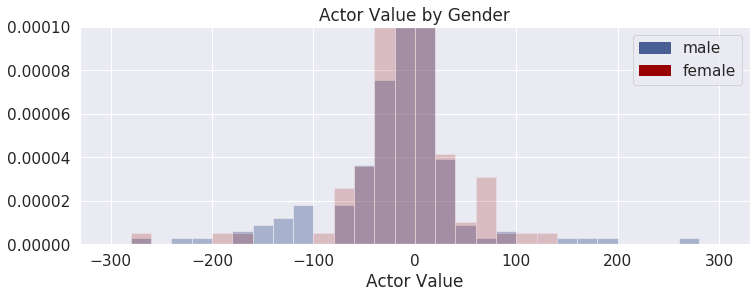

In [33]:
# plot actor value distributions of genders

plt.ylim(0, 0.0001)

bin_range = np.arange(-300, 301, 20)

sns.distplot(male_val, norm_hist=True, bins=bin_range ,kde=False, color=mp.colors(0))
sns.distplot(female_val, norm_hist=True, bins=bin_range, kde=False, color=mp.colors(2), hist_kws={'alpha':0.2})

plt.legend(handles=[blue_patch, red_patch])

plt.xlabel('Actor Value')
plt.title('Actor Value by Gender');

The distributions are very segmented with many unique values.<br>
I'll do more ECDF comparision.

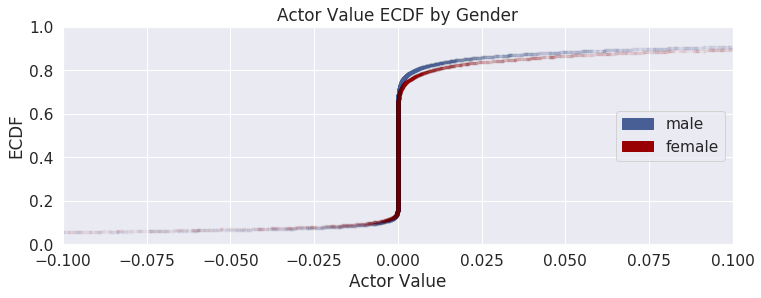

In [34]:
# plot Emperical Cumulative Distribution Functions for actor value by gender

plt.xlim(-0.1, 0.1)
plt.ylim(0, 1)

x_1, y_1 = ecdf(male_val)
x_2, y_2 = ecdf(female_val)

plt.plot(x_1, y_1, marker='.', linestyle='none', color=mp.colors(0), alpha=0.02)
plt.plot(x_2, y_2, marker='.', linestyle='none', color=mp.colors(2), alpha=0.02)

plt.legend(handles=[blue_patch, red_patch], loc=5)

plt.xlabel('Actor Value')
plt.ylabel("ECDF")
plt.title('Actor Value ECDF by Gender');

The ECDFs are very nearly overlapping.<br>
Let's look closer at values near the y-axis.

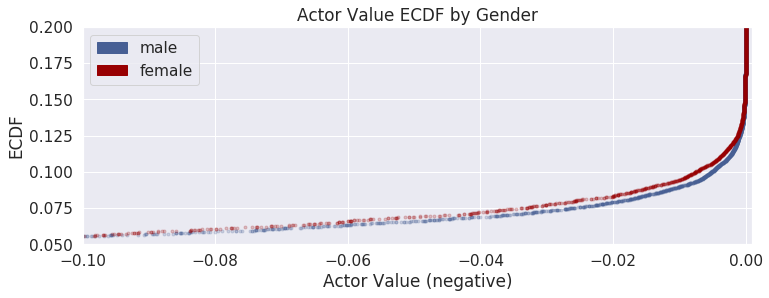

In [35]:
# plot Emperical Cumulative Distribution Functions for actor value by gender

# zoom in on small negative values
plt.xlim(-0.1, 0.001)
plt.ylim(0.05, 0.2)

x_1, y_1 = ecdf(male_val)
x_2, y_2 = ecdf(female_val)

plt.plot(x_1, y_1, marker='.', linestyle='none', color=mp.colors(0), alpha=0.2)
plt.plot(x_2, y_2, marker='.', linestyle='none', color=mp.colors(2), alpha=0.2)

plt.legend(handles=[blue_patch, red_patch], loc=2)

plt.xlabel('Actor Value (negative)')
plt.ylabel("ECDF")
plt.title('Actor Value ECDF by Gender');

There starts to be more female actors who are given credit for the failure of a film just before the actor values become positive.

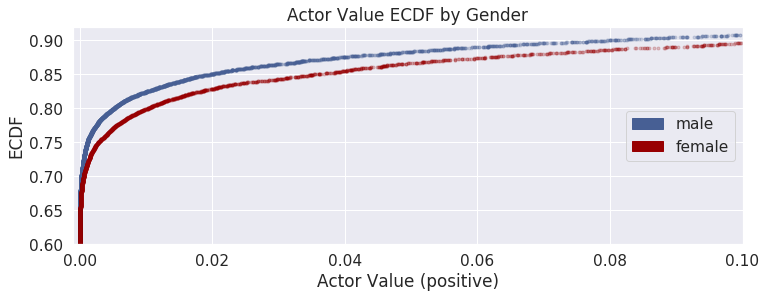

In [36]:
# plot Emperical Cumulative Distribution Functions for actor value by gender

# zoom in on small positive values
plt.xlim(-0.001, 0.1)
plt.ylim(0.6, 0.92)

x_1, y_1 = ecdf(male_val)
x_2, y_2 = ecdf(female_val)
plt.plot(x_1, y_1, marker='.', linestyle='none', color=mp.colors(0), alpha=0.2)
plt.plot(x_2, y_2, marker='.', linestyle='none', color=mp.colors(2), alpha=0.2)

plt.legend(handles=[blue_patch, red_patch], loc=5)

plt.xlabel('Actor Value (positive)')
plt.ylabel("ECDF")
plt.title('Actor Value ECDF by Gender');

There starts to be more male actors who are given credit for the success of a film just after the actor values become positive.

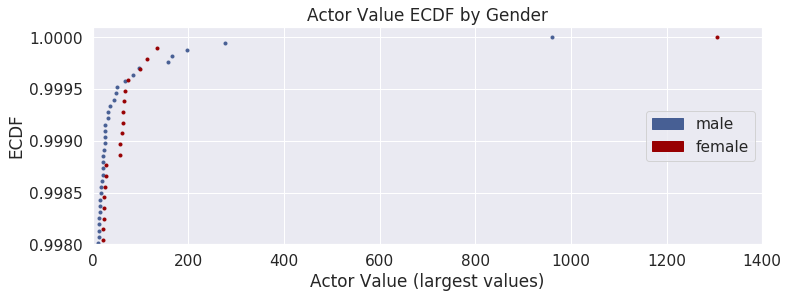

In [37]:
# plot Emperical Cumulative Distribution Functions for actor value by gender

# zoom in on small positive values
plt.xlim(-0.001, 1400)
plt.ylim(0.998, 1.0001)

x_1, y_1 = ecdf(male_val)
x_2, y_2 = ecdf(female_val)
plt.plot(x_1, y_1, marker='.', linestyle='none', color=mp.colors(0))
plt.plot(x_2, y_2, marker='.', linestyle='none', color=mp.colors(2))

plt.legend(handles=[blue_patch, red_patch], loc=5)

plt.xlabel('Actor Value (largest values)')
plt.ylabel("ECDF")
plt.title('Actor Value ECDF by Gender');

The female actors overtake the male actors at the highest end of the actor value range, starting at values around 100.

I will conduct another hypothesis test to compare the two distributions.

H_0: There is not a significant difference in the distribution of actor values between male and female actors.<br>
H_A: There is a significant difference in the distribution of actor values between male and female actors.

In [38]:
# gernerate 10,000 permutation samples
np.random.seed(27)
perm_sample_male_val, perm_sample_female_val = draw_perm_samples(male_val, female_val, size=10000)

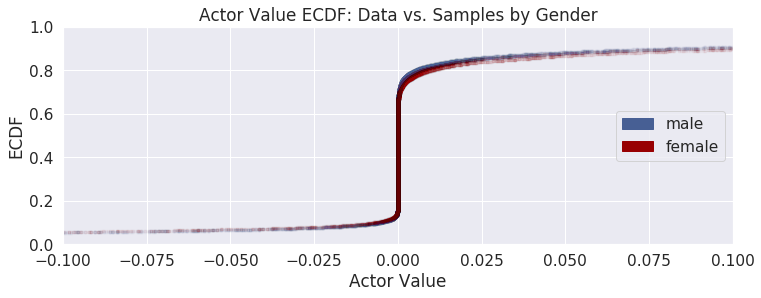

In [39]:
# plot Emperical Cumulative Distribution Functions for samples and data

plt.xlim(-0.1, 0.1)
plt.ylim(0, 1)

x_1, y_1 = ecdf(perm_sample_male_val)
x_2, y_2 = ecdf(perm_sample_female_val)

plt.plot(x_1, y_1, marker='.', linestyle='none', color=mp.colors(0) , alpha=0.02)
plt.plot(x_2, y_2, marker='.', linestyle='none', color=mp.colors(2), alpha=0.02)

x_1, y_1 = ecdf(male_val)
x_2, y_2 = ecdf(female_val)

plt.plot(x_1, y_1, marker='.', linestyle='none', color=mp.colors(0), alpha=0.02)
plt.plot(x_2, y_2, marker='.', linestyle='none', color=mp.colors(2), alpha=0.02)

plt.legend(handles=[blue_patch, red_patch], loc=5)

plt.xlabel('Actor Value')
plt.ylabel("ECDF")
plt.title('Actor Value ECDF: Data vs. Samples by Gender');

The curves overlay nicely.<br>
Let's zoom in, again.

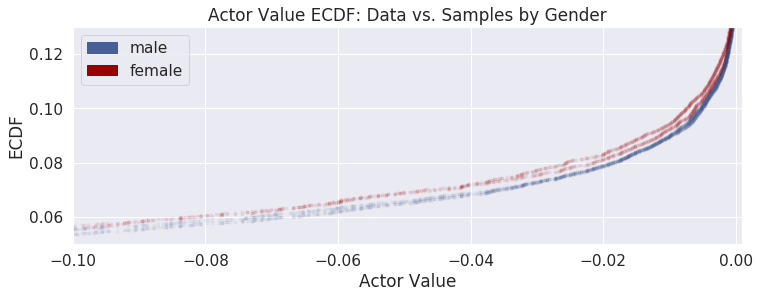

In [40]:
# plot Emperical Cumulative Distribution Functions for samples and data

# zoom in on small negative values
plt.xlim(-0.1, 0.001)
plt.ylim(0.05, 0.13)

x_1, y_1 = ecdf(perm_sample_male_val)
x_2, y_2 = ecdf(perm_sample_female_val)

plt.plot(x_1, y_1, marker='.', linestyle='none', color=mp.colors(0) , alpha=0.05)
plt.plot(x_2, y_2, marker='.', linestyle='none', color=mp.colors(2), alpha=0.05)

x_1, y_1 = ecdf(male_val)
x_2, y_2 = ecdf(female_val)

plt.plot(x_1, y_1, marker='.', linestyle='none', color=mp.colors(0), alpha=0.05)
plt.plot(x_2, y_2, marker='.', linestyle='none', color=mp.colors(2), alpha=0.05)

plt.legend(handles=[blue_patch, red_patch], loc=2)

plt.xlabel('Actor Value')
plt.ylabel("ECDF")
plt.title('Actor Value ECDF: Data vs. Samples by Gender');

The samples overlay tightly in this range.

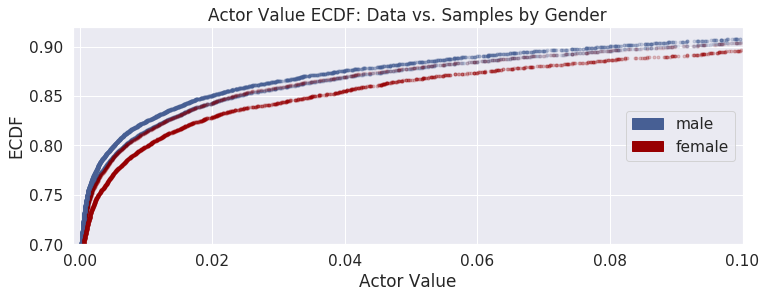

In [41]:
# plot Emperical Cumulative Distribution Functions for samples and data

# zoom in on small positive values
plt.xlim(-0.001, 0.1)
plt.ylim(0.7, 0.92)

x_1, y_1 = ecdf(perm_sample_male_val)
x_2, y_2 = ecdf(perm_sample_female_val)

plt.plot(x_1, y_1, marker='.', linestyle='none', color=mp.colors(0) , alpha=0.1)
plt.plot(x_2, y_2, marker='.', linestyle='none', color=mp.colors(2), alpha=0.05)

x_1, y_1 = ecdf(male_val)
x_2, y_2 = ecdf(female_val)

plt.plot(x_1, y_1, marker='.', linestyle='none', color=mp.colors(0), alpha=0.2)
plt.plot(x_2, y_2, marker='.', linestyle='none', color=mp.colors(2), alpha=0.2)

plt.legend(handles=[blue_patch, red_patch], loc=5)

plt.xlabel('Actor Value')
plt.ylabel("ECDF")
plt.title('Actor Value ECDF: Data vs. Samples by Gender');

The samples align closer to the observed male actor values than they do to the observed female actor values in this range.

Now, I will compare the mean actor value difference.

In [42]:
# get observed mean actor value difference
mean_val_diff_obs = diff_of_means(male_val, female_val)

In [43]:
f'The mean actor value difference of the data is: {mean_val_diff_obs:.1f}.'

'The mean actor value difference of the data is: -59.3.'

In [44]:
f'The mean actor value difference of the samples is: {diff_of_means(perm_sample_male_val, perm_sample_female_val):.1f}.'

'The mean actor value difference of the samples is: 5.7.'

From these means, it doesn't look good for the null hypothesis, but these values are close to each other when considering the range of actor values.<br>
It's time to use statistics.<br>
I will calculate the probability of getting a mean actor value difference of -59.3 or less under the null hypothesis.

In [45]:
# create replicates of mean actor value difference
np.random.seed(27)
perm_reps_val = draw_perm_reps(male_val, female_val, diff_of_means, size=10000)

In [46]:
# compute p-value
p_val = np.sum(perm_reps_val <= mean_val_diff_obs) / len(perm_reps_val)
f'The p-value is: {p_val}.'

'The p-value is: 0.0031.'

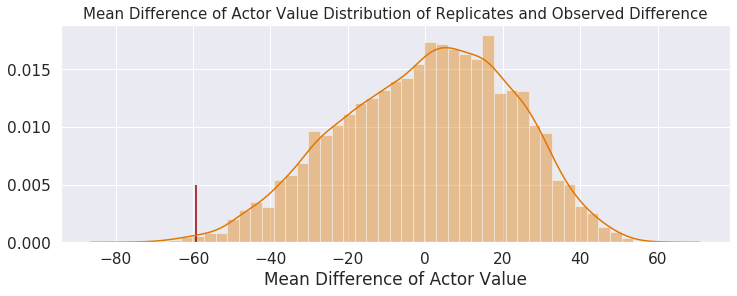

In [47]:
# plot permutation replicates and compare with observed mean difference

sns.distplot(perm_reps_val, color=mp.colors(5))
plt.vlines(mean_val_diff_obs, ymin=0, ymax=0.005, colors=mp.colors(2))

plt.xlabel('Mean Difference of Actor Value')
plt.title('Mean Difference of Actor Value Distribution of Replicates and Observed Difference', fontsize=15);

The probability is below 1% that we will see at least a difference of -59.3 or greater by chance when the distibutions are the same.<br>
The null hypothesis can be rejected.

Finally, I will investigate the very small positive correlation coefficient with respect to the target variable and gender.

In [48]:
# get the correlation coefficient between actor age and gender
df.loc[:, ['actor_value', 'gender']].corr()

,actor_value,gender
actor_value,1.000000,0.008429
gender,0.008429,1.000000


H_0: There is not a significant linear correlation between actor value and gender.<br>
H_A: There is a significant linear correlation between actor value and gender.

In [49]:
def pearson_r(x, y):
    """Compute correlation coefficient between 2 arrays"""
    corr_mat = np.corrcoef(x, y)
    
    return corr_mat[0, 1]

In [50]:
# get observed correlation
corr_obs = pearson_r(df['actor_value'], df['gender'])

In [51]:
# initialize permutation replicates
perm_replicates = np.empty(10000)
# draw replicates
np.random.seed(27)
for i in range(10000):
    # permute both sets of values
    vals_permuted = np.random.permutation(df['actor_value'])
    gender_permuted = np.random.permutation(df['gender'])
    # get correlation coefficients
    perm_replicates[i] = pearson_r(vals_permuted, gender_permuted)

In [52]:
# compute p-value
p_corr = np.sum(perm_replicates > corr_obs) / len(perm_replicates)
f'The p-value is: {p_corr}.'

'The p-value is: 0.0721.'

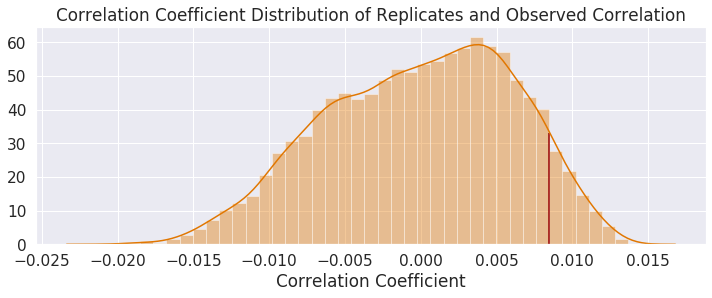

In [53]:
# plot permutation replicates and compare with observed correlation

sns.distplot(perm_replicates, color=mp.colors(5))
plt.vlines(corr_obs, ymin=0, ymax=33, colors=mp.colors(2))

plt.xlabel('Correlation Coefficient')
plt.title('Correlation Coefficient Distribution of Replicates and Observed Correlation');

The fraction of replicates having a correlation greater than the observed correlation of 0.0084 is just over 7%.<br>
The null hypothesis can not be rejected.<br>
It is reasonable to believe that there is no significant correlation between actor value and gender.